Student Performance & Behavior Dataset (Kaggle)
Records: Around 5,000 students

Columns include:

Student_ID

Attendance (%)

Midterm_Score, Final_Score

Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score

In [2]:
# Importing required library
import pandas as pd
import numpy as np

In [3]:
# Reading Dataset
df = pd.read_csv('Students Performance Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [4]:
# To get the Column names
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [5]:
# remove unnecessary columns
columns_to_keep = [
    'Student_ID',
    'Attendance (%)',
    'Final_Score',
    'Participation_Score'
]
required_df = df[columns_to_keep]
required_df.head()

,Student_ID,Attendance (%),Final_Score,Participation_Score
0,S1000,97.36,59.61,73.4
1,S1001,97.71,74.00,88.0
2,S1002,99.52,63.85,4.7
3,S1003,90.38,44.44,4.2
4,S1004,59.41,61.77,64.3


In [7]:
#Renaming columns
import warnings
warnings.filterwarnings('ignore')
required_df.rename(columns={
    'Attendance (%)': 'attendance',
    'Final_Score': 'marks',
    'Participation_Score': 'logins'
}, inplace=True)
required_df.head()

,Student_ID,attendance,marks,logins
0,S1000,97.36,59.61,73.4
1,S1001,97.71,74.00,88.0
2,S1002,99.52,63.85,4.7
3,S1003,90.38,44.44,4.2
4,S1004,59.41,61.77,64.3


In [8]:
# To get the information about each columns
required_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  5000 non-null   object 
 1   attendance  5000 non-null   float64
 2   marks       5000 non-null   float64
 3   logins      5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 156.4+ KB


In [9]:
# To check null values present in the dataFrame
required_df.isnull().sum()

,0
Student_ID,0
attendance,0
marks,0
logins,0


In [10]:
# Calculate the overall averages for:

# Marks

# Attendance

# Logins

print(f"Marks: {required_df['marks'].mean()}")
print(f"Attendance: {required_df['attendance'].mean()}")
print(f"Logins: {required_df['logins'].mean()}")

Marks: 69.546552
Attendance: 75.356076
Logins: 49.96372


In [11]:
# Correlation
correlations = required_df[['marks', 'attendance', 'logins']].corr()
print(correlations)

               marks  attendance    logins
marks       1.000000   -0.009300 -0.011764
attendance -0.009300    1.000000  0.009051
logins     -0.011764    0.009051  1.000000


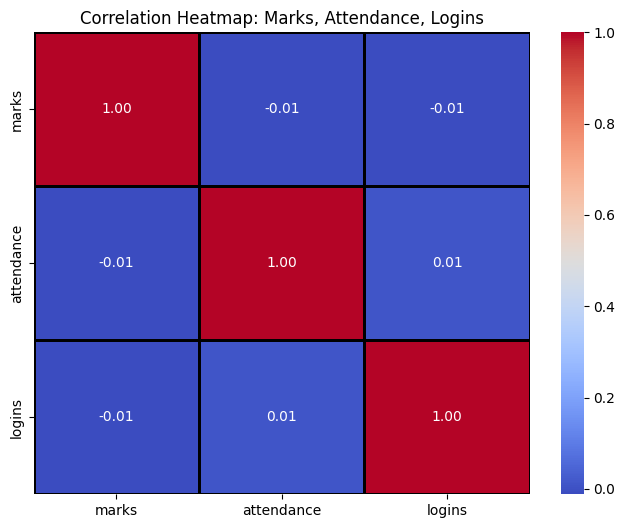

In [12]:
# visualizing Correlation Heatmap with respect to Marks, Attendance and Logins
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm',linewidths=2,linecolor='black',fmt='.2f')
plt.title('Correlation Heatmap: Marks, Attendance, Logins')
plt.show()

In [13]:
# Calculate the impact of absenteeism on marks by comparing average marks of students with high attendance vs low attendance

attendence_threshold = required_df['attendance'].mean()

low_attendence = required_df[required_df['attendance'] < attendence_threshold]
high_attendence = required_df[required_df['attendance'] >= attendence_threshold]

print(f"Average marks of students with low attendance: {low_attendence['marks'].mean()}")
print(f"Average marks of students with high attendance: {high_attendence['marks'].mean()}")

Average marks of students with low attendance: 69.65165589660744
Average marks of students with high attendance: 69.4434469096672


In [14]:
# Visualize Top vs Struggling Students

top_students = required_df.sort_values(by='marks', ascending=False).head(10)
struggling_students = required_df.sort_values(by='marks', ascending=True).head(10)

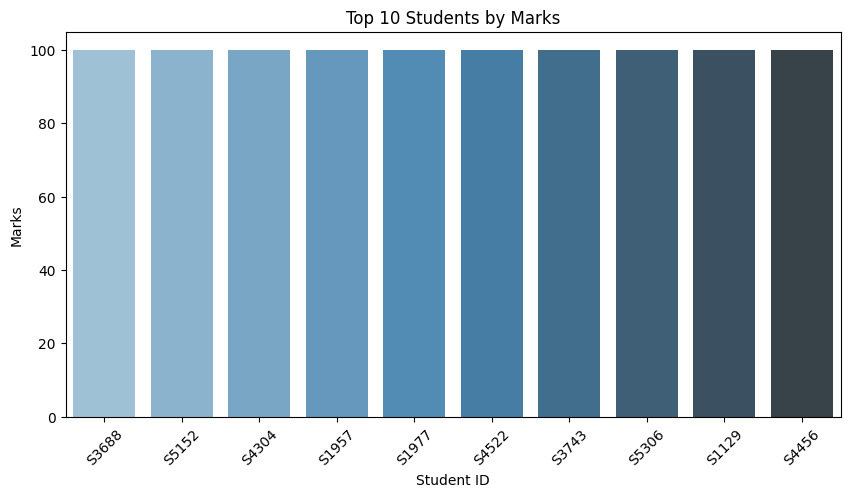

In [15]:
# Bar Chart: Top 10 Students

plt.figure(figsize=(10,5))
sns.barplot(x='Student_ID', y='marks', data=top_students, palette='Blues_d')
plt.title('Top 10 Students by Marks')
plt.xticks(rotation=45)
plt.xlabel('Student ID')
plt.ylabel('Marks')
plt.show()

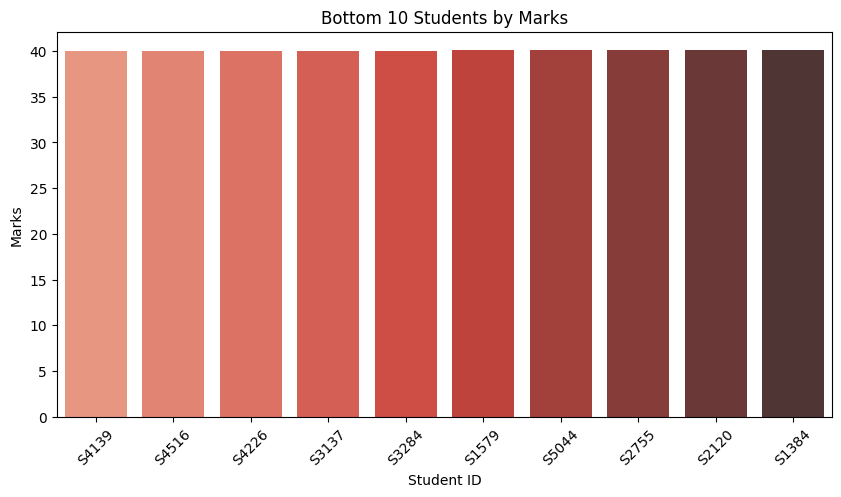

In [17]:
# Bar Chart: Bottom 10 Students

plt.figure(figsize=(10,5))
sns.barplot(x='Student_ID', y='marks', data=struggling_students, palette='Reds_d')
plt.title('Bottom 10 Students by Marks')
plt.xticks(rotation=45)
plt.xlabel('Student ID')
plt.ylabel('Marks')
plt.show()

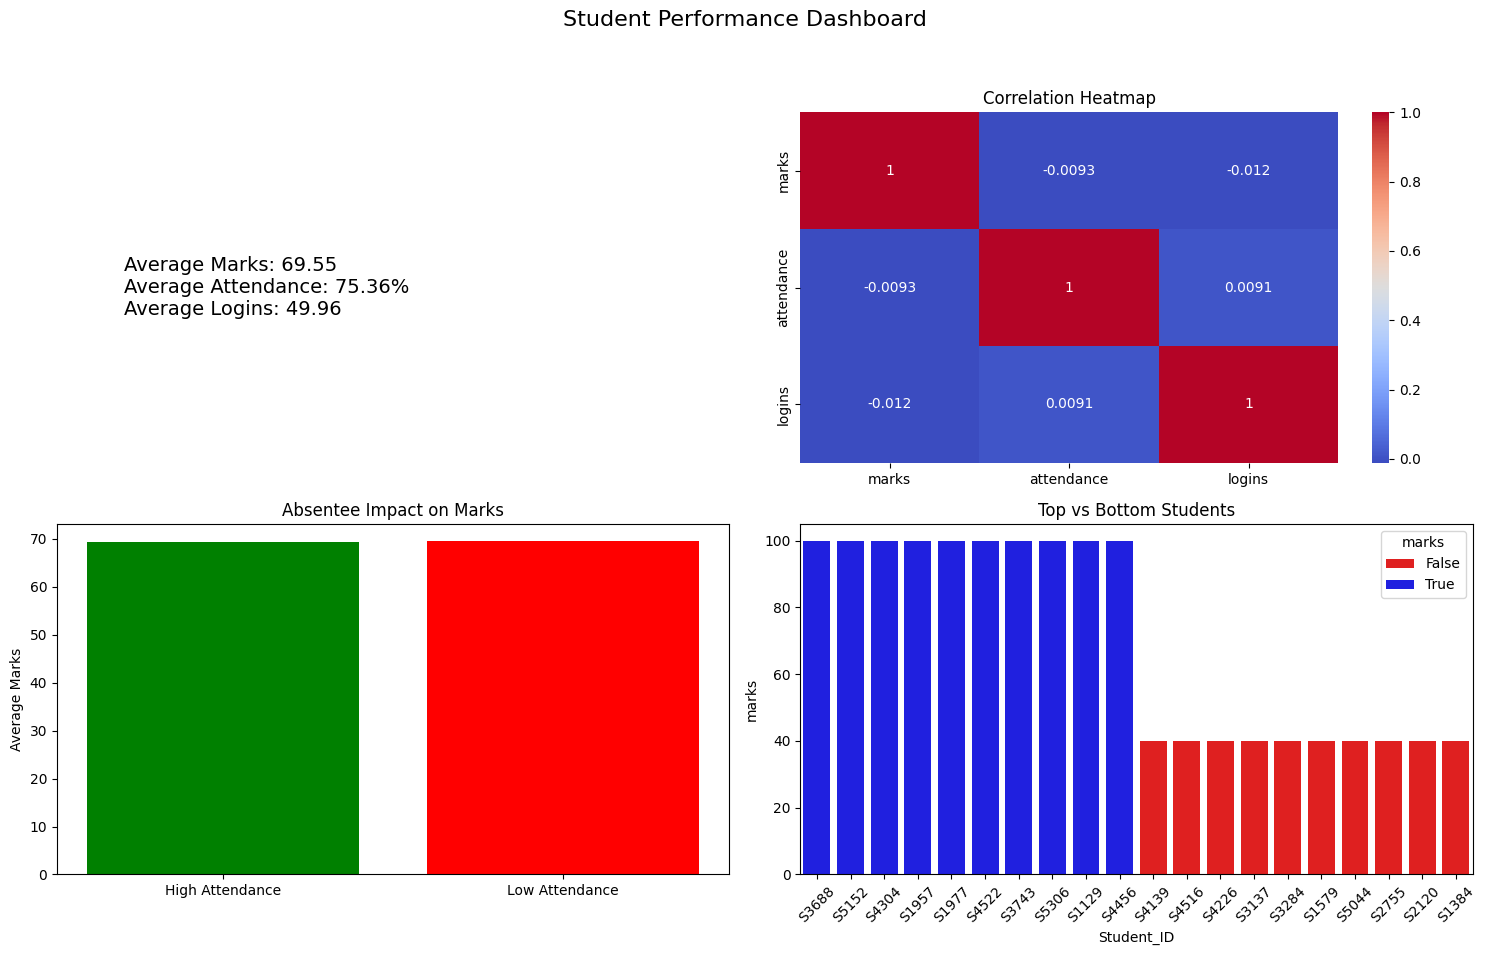

In [19]:
# Final Dashboard

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate averages
avg_marks = required_df['marks'].mean()
avg_attendance = required_df['attendance'].mean()
avg_logins = required_df['logins'].mean()

# Calculate correlation
correlations = required_df[['marks', 'attendance', 'logins']].corr()

# Calculate absentee impact
attendance_threshold = avg_attendance
high_attendance = required_df[required_df['attendance'] >= attendance_threshold]
low_attendance = required_df[required_df['attendance'] < attendance_threshold]
high_avg_marks = high_attendance['marks'].mean()
low_avg_marks = low_attendance['marks'].mean()

# Top & bottom students
top_students = required_df.sort_values(by='marks', ascending=False).head(10)
bottom_students = required_df.sort_values(by='marks').head(10)

# Create 2x2 dashboard
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Student Performance Dashboard", fontsize=16)

# Quadrant 1: Averages
axs[0,0].axis('off')  # Turn off axes for text
avg_text = f"""
Average Marks: {avg_marks:.2f}
Average Attendance: {avg_attendance:.2f}%
Average Logins: {avg_logins:.2f}
"""
axs[0,0].text(0.1, 0.5, avg_text, fontsize=14, va='center')

# Quadrant 2: Correlation Heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', ax=axs[0,1])
axs[0,1].set_title('Correlation Heatmap')

# Quadrant 3: Absentee Impact
axs[1,0].bar(['High Attendance', 'Low Attendance'],
             [high_avg_marks, low_avg_marks],
             color=['green', 'red'])
axs[1,0].set_title('Absentee Impact on Marks')
axs[1,0].set_ylabel('Average Marks')

# Quadrant 4: Top vs Bottom Students
top_bottom_data = pd.concat([top_students, bottom_students])
sns.barplot(x='Student_ID', y='marks', hue=top_bottom_data['marks'].rank(ascending=False) <= 10,
            data=top_bottom_data, dodge=False, ax=axs[1,1],
            palette={True: 'blue', False: 'red'})
axs[1,1].set_title('Top vs Bottom Students')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('student_performance_dashboard.png')
plt.show()


📌 Conclusion from the Student Performance Dashboard
🔢 1. General Performance Insights
Average Marks: 69.55

Average Attendance: 75.36%

Average Logins: 49.96

Students are performing fairly well on average, with decent attendance and login activity, indicating moderate engagement.

🔬 2. Correlation Analysis (Heatmap)
Very weak or no correlation between:

Marks and Attendance: -0.0093

Marks and Logins: -0.012

Attendance and Logins: +0.0091

📉 These near-zero correlation values suggest that none of the tracked features (attendance, logins) have a strong linear impact on student marks, at least in the current dataset.

🧮 3. Absentee Impact on Marks
Students with High Attendance and those with Low Attendance both average ~69–70 marks.

Minimal difference in marks implies:

🟢 High Attendance students: slightly better
🔴 Low Attendance students: nearly the same

🥇 4. Top vs Bottom Students
Clear separation between:

Top Scorers (Blue): Marks near 100

Bottom Scorers (Red): Marks around 40

Indicates a bimodal distribution — there are two distinct groups: high achievers and low performers.
Could be due to:

Different motivation levels

Unequal access to learning resources

Lack of consistent engagement by some students